# Background Subtraction: Reference Implementation

    pip install jupyter matplotlib scipy scikit-image
    jupyter notebook

In [1]:
%matplotlib inline

import sys
from os.path import abspath, join, dirname, exists

this_folder = abspath(".")
src_gen_path = abspath(join(this_folder, "src-gen"))
sys.path.append(src_gen_path)


In [2]:
from my_image_lib.GrayImage import GrayImage
from my_image_lib.background_subtraction.AlgoBackgroundSubtraction import AlgoBackgroundSubtraction
from my_image_lib.background_subtraction.BackgroundSubtractionResults import BackgroundSubtractionResults
from scipy.ndimage import median_filter
import numpy as np
from pylab import *
from skimage.io import imread

class MyAlgoBackgroundSubtraction(AlgoBackgroundSubtraction):
    def compute(self, inp, res):
        res.threshold.pixel = array(median_filter(inp.pixel, self.params.n), dtype=float) + self.params.threshold
        res.result.pixel = array(inp.pixel > res.threshold.pixel, dtype=float)

inp = GrayImage()
inp.pixel = imread("zeitung.png", as_gray=True)/255.0
ref_res = BackgroundSubtractionResults()
algo = MyAlgoBackgroundSubtraction()
algo.compute(inp, ref_res)

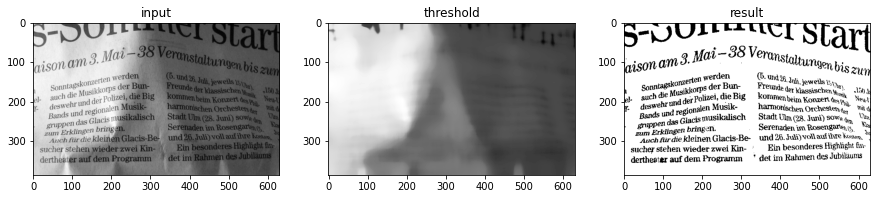

In [4]:
figure(figsize=[15,5])

subplot(1,3,1)
title("input")
imshow(inp.pixel, cm.gray)

subplot(1,3,2)
title("threshold")
imshow(ref_res.threshold.pixel, cm.gray)

subplot(1,3,3)
title("result")
imshow(ref_res.result.pixel, cm.gray);